# Plotting results

This notebook contains the code for generating the bar plots of model performance for various chunk sizes. The graphs are generated using Plotnine, which is a Python data visualization package that replicates R's ggplot.

In [1]:
import pandas as pd
from plotnine import *
from pathlib import Path
from pandas.api.types import CategoricalDtype
import numpy as np

In [2]:
data_path = Path('./results')

In [16]:
colors = ["#00BA38", "#619CFF", "#f8766d"]

In [4]:
model_categories = CategoricalDtype(categories=["CNN", "AWD-LSTM", "RoBERTa", "GPT-2"], ordered=True)

### Plot of proxy task accuracy for various pretraining levels

In [10]:
chunks_df = pd.read_csv(data_path/'accuracy_by_chunk_size.csv')

In [11]:
chunks_df.head()

,Chunk,Pretraining amount,Model,Accuracy
0,Fragment 64,None,CNN,47.50
1,Fragment 64,None,AWD-LSTM,31.99
2,Fragment 64,None,RoBERTa,36.82
3,Fragment 64,None,GPT-2,37.33
4,Fragment 64,Target,AWD-LSTM,47.90


In [12]:
# convert these columns from object type to category and impose an ordering for plotting
model_categories = CategoricalDtype(categories=["CNN", "AWD-LSTM", "RoBERTa", "GPT-2"], ordered=True)
chunks_df.Model = chunks_df.Model.astype(model_categories)
chunk_categories = CategoricalDtype(categories=["Fragment 64", "Fragment 128", "Fragment 256"], ordered=True)
chunks_df.Chunk = chunks_df.Chunk.astype(chunk_categories)
pretraining_categories = CategoricalDtype(categories=["None", "Target", "IMSLP"], ordered=True)
chunks_df['Pretraining amount'] = chunks_df['Pretraining amount'].astype(pretraining_categories)

In [13]:
# generate abbreviated labels for each model
model_to_name = {"CNN": "CNN", "AWD-LSTM":"ALSTM", "RoBERTa": "RBRTa", "GPT-2": "GPT2"}
chunks_df.Model = chunks_df.Model.apply(lambda x: model_to_name[x])

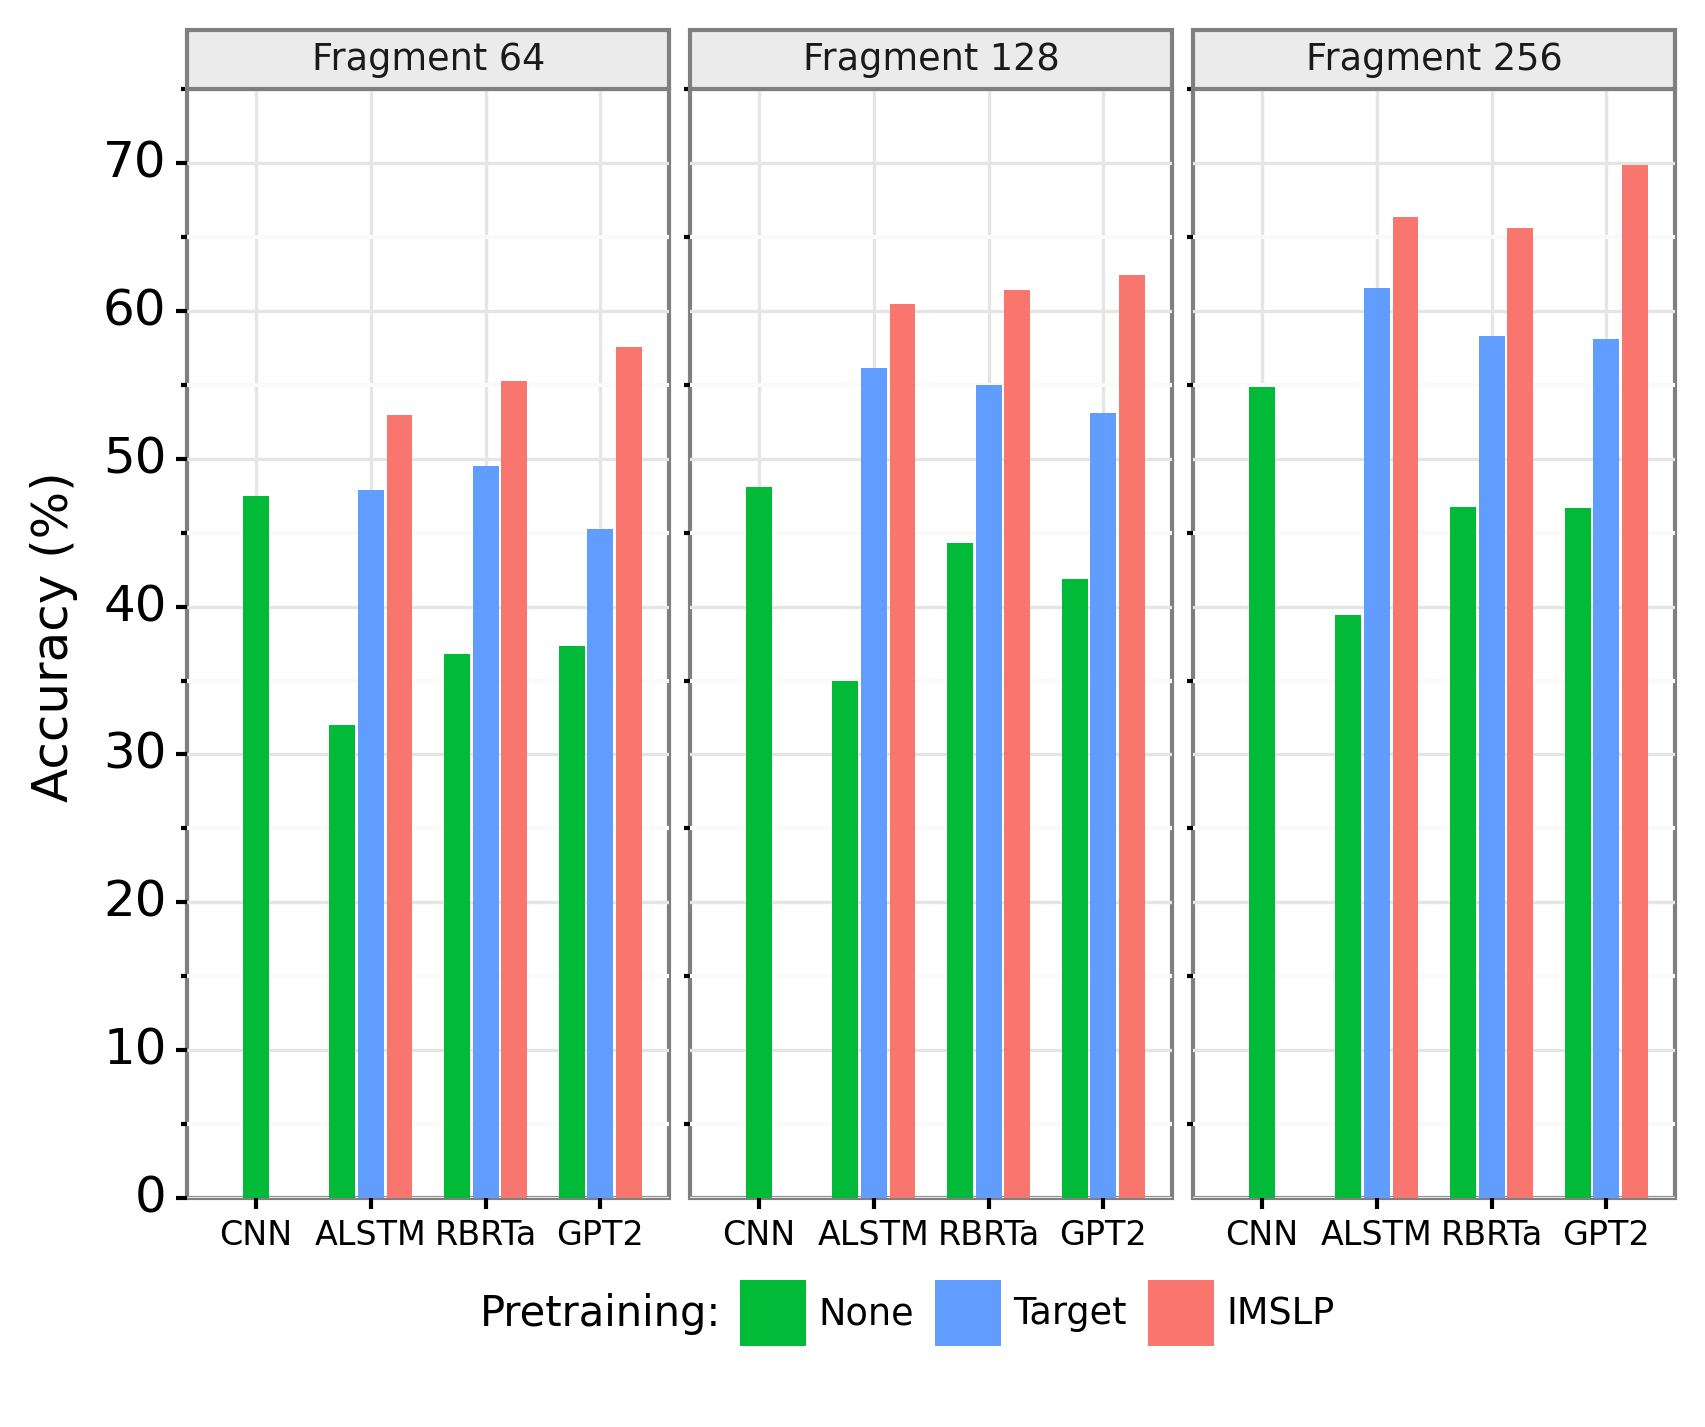

<ggplot: (-9223363276753840433)>

In [15]:
# proxy task accuracies
(ggplot(chunks_df, aes(x="Model", y="Accuracy", fill="Pretraining amount")) +
    geom_bar(width = 0.75, position=position_dodge2(preserve='single', width=0.95), stat='identity') +
    scale_y_continuous(expand = [0, 0], breaks=range(0, 75, 10), limits = [0, 75]) +
    scale_fill_manual(values=colors) +
    facet_grid('. ~ Chunk') +
    theme_bw() + 
    labs(y = "Accuracy (%)") +
    theme(dpi=300, legend_position=(0.5, 0.03), legend_direction="horizontal", legend_title_align='bottom', 
            legend_background=element_blank(),
            legend_title = element_text(size=10),
            strip_background = element_rect(fill="#ebebeb"),
            plot_title = element_text(size=14, colour='black', margin={'b': 12}),
            axis_text_x = element_text(size = 8, colour='black'),
            axis_text_y = element_text(size = 12, colour='black'), 
            axis_title_x = element_blank(),
            axis_title_y = element_text(size = 12, margin={'r': 6})) +
    guides(fill=guide_legend(title="Pretraining:", title_position='left', label_position="right"))).save('./accuracy_plot.png')

### Plot of Macro F1 for various pretraining levels

In [17]:
finalized_f1_df = pd.read_csv(data_path/'finalized_f1.csv')

In [18]:
# convert these columns from object type to category and impose an ordering for plotting
model_categories = CategoricalDtype(categories=["CNN", "AWD-LSTM", "RoBERTa", "GPT-2"], ordered=True)
finalized_f1_df.Model = finalized_f1_df.Model.astype(model_categories)
chunk_categories = CategoricalDtype(categories=["Fragment 64", "Fragment 128", "Fragment 256"], ordered=True)
finalized_f1_df.Chunk = finalized_f1_df.Chunk.astype(chunk_categories)
pretraining_categories = CategoricalDtype(categories=["None", "Target", "IMSLP"], ordered=True)
finalized_f1_df['Pretraining'] = finalized_f1_df['Pretraining'].astype(pretraining_categories)

In [19]:
# generate abbreviated labels for each model
model_to_name = {"CNN": "CNN", "AWD-LSTM":"ALSTM", "RoBERTa": "RBRTa", "GPT-2": "GPT2"}
finalized_f1_df.Model = finalized_f1_df.Model.apply(lambda x: model_to_name[x])

In [20]:
finalized_f1_df.head()

,Chunk,Pretraining,Model,Macro F1
0,Fragment 64,None,CNN,0.5690
1,Fragment 64,None,ALSTM,0.3535
2,Fragment 64,None,RBRTa,0.4447
3,Fragment 64,None,GPT2,0.4109
4,Fragment 64,Target,ALSTM,0.5355


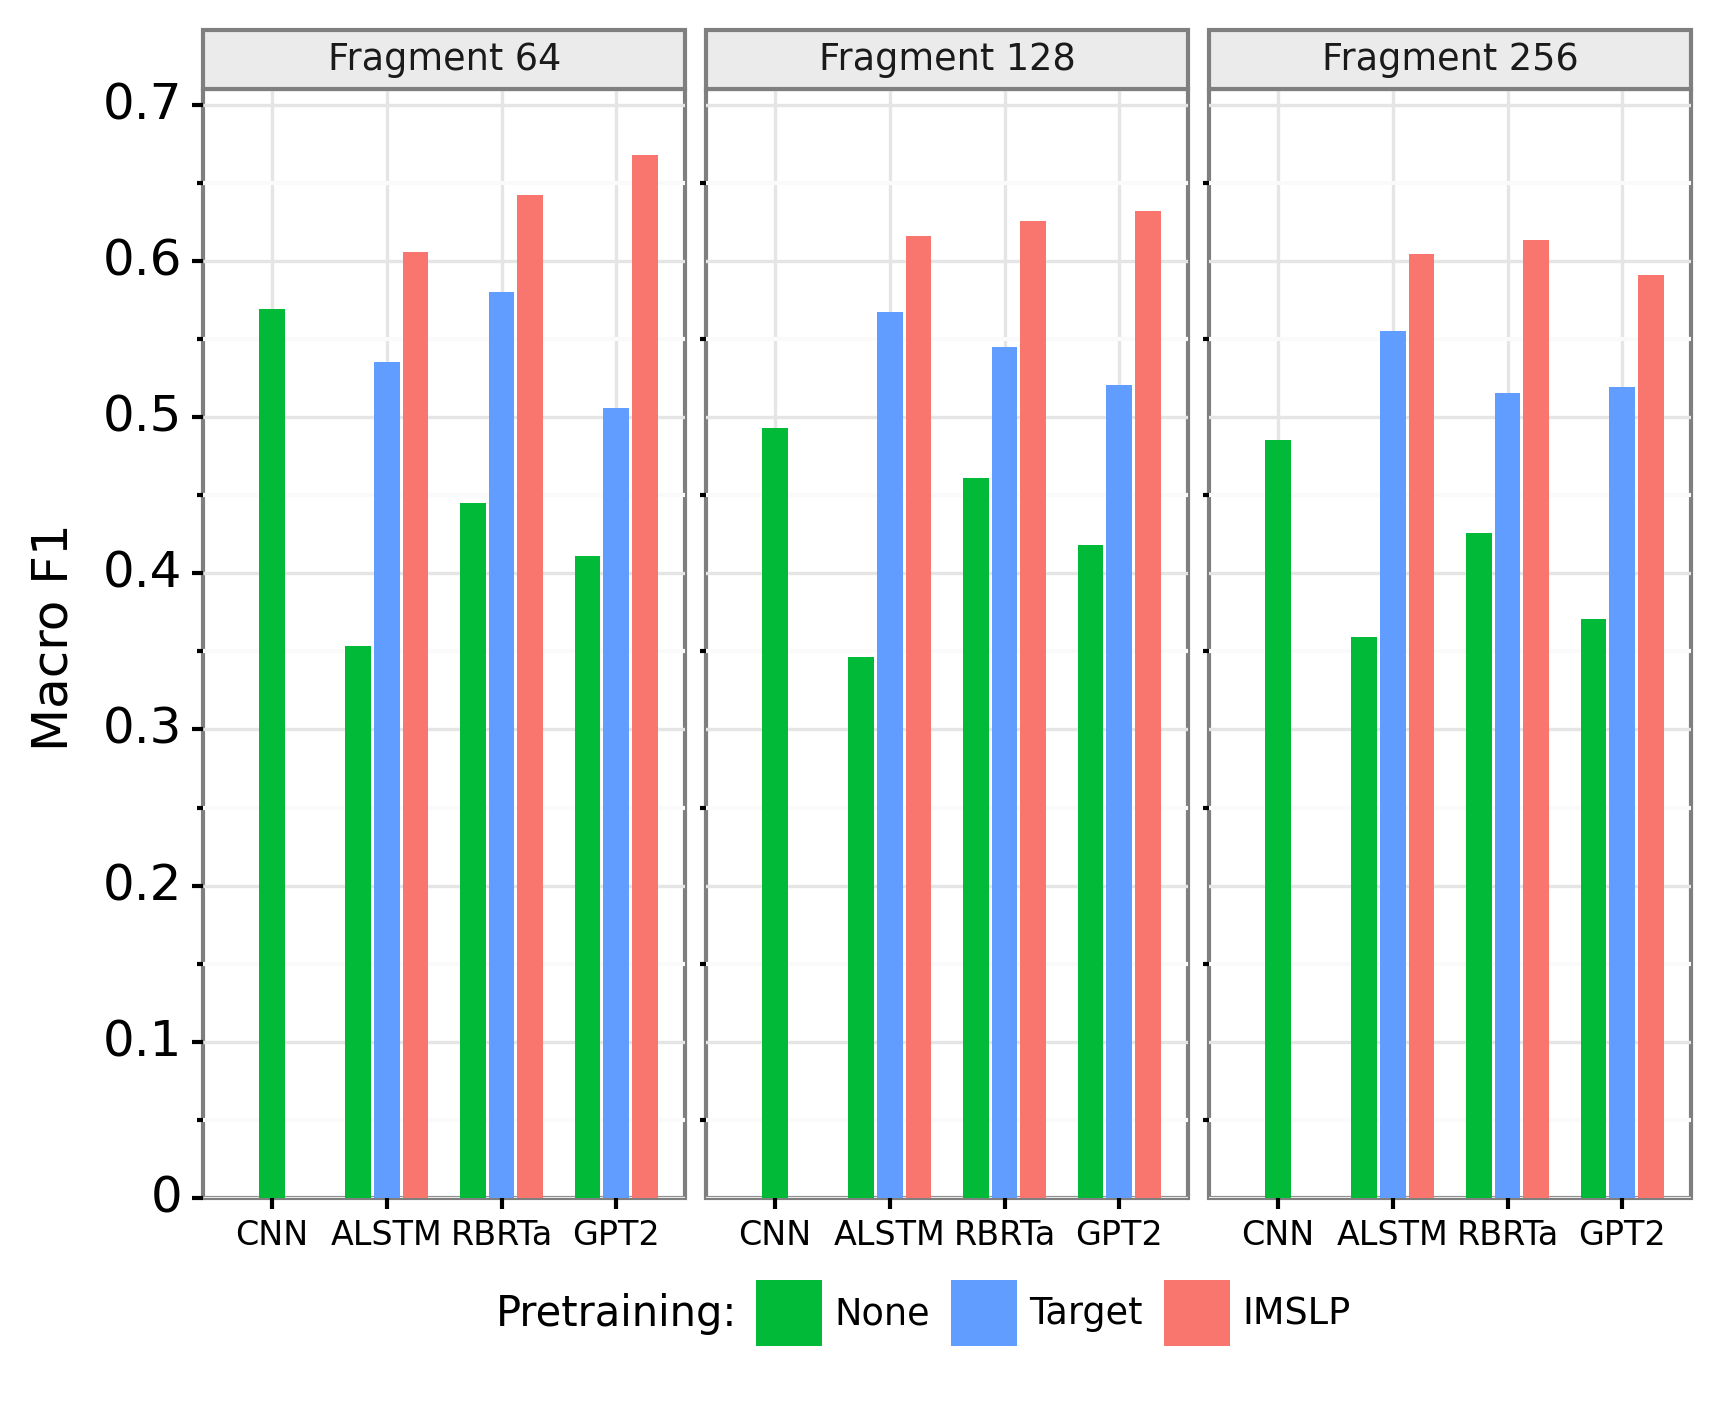

<ggplot: (-9223363276753861660)>

In [21]:
# proxy task F1 scores
(ggplot(finalized_f1_df, aes(x="Model", y="Macro F1", fill="Pretraining")) +
    geom_bar(width = 0.75, position=position_dodge2(preserve='single', width=0.95), stat='identity') +
    scale_y_continuous(expand = [0, 0], breaks=np.arange(0.0, 0.75, 0.1), limits = [0, 0.71]) +
    scale_fill_manual(values=colors_1) +
    facet_grid('. ~ Chunk') +
    theme_bw() + 
    labs(y = "Macro F1") +
    theme(dpi=300, legend_position=(0.5, 0.03), legend_direction="horizontal", legend_title_align='bottom', 
            legend_background=element_blank(),
            legend_title = element_text(size=10),
            strip_background = element_rect(fill="#ebebeb"),
            plot_title = element_text(size=14, colour='black', margin={'b': 12}),
            axis_text_x = element_text(size = 8, colour='black'),
            axis_text_y = element_text(size = 12, colour='black'), 
            axis_title_x = element_blank(),
            axis_title_y = element_text(size = 12, margin={'r': 6})) +
    guides(fill=guide_legend(title="Pretraining:", title_position='left', label_position="right"))).save('./f1_plot.png')